<a href="https://colab.research.google.com/github/vikkkkos/ML-2024/blob/main/ml_02_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Описание задачи
Этот набор данных содержит комплексные данные о погоде, собранные в 20 крупных городах США в течение 2024 и 2025 годов. Он содержит множество погодных атрибутов, которые имеют решающее значение для прогнозирования того, будет ли дождь на следующий день или нет.

Каждая строка представляет погодные условия одного дня.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 1. Чтение данных

In [2]:
data = pd.read_csv('usa_rain_prediction_dataset_2024_2025.csv')

In [3]:
data.shape

(73100, 9)

In [4]:
data.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [5]:
data.tail()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1
73099,2025-12-31,Washington D.C.,54.648609,80.812021,22.722505,0.151903,19.674960,974.835534,0


In [6]:
data.columns

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

*   Date - дата
*   Location - местоположение
*   Temperature - температура
*   Humidity - влажность воздуха
*   Wind Speed - скорость ветра
*   Precipitation - уровень осадков
*   Cloud Cover - облачность
*   Pressure - атмосферное давление
*   Rain Tomorrow - будет ли завтра дождь?

In [7]:
data.dtypes

,0
Date,object
Location,object
Temperature,float64
Humidity,float64
Wind Speed,float64
Precipitation,float64
Cloud Cover,float64
Pressure,float64
Rain Tomorrow,int64


Date и Location - категориальные переменные

In [8]:
data['Date'] = data['Date'].astype('category')
data['Date'].dtype

CategoricalDtype(categories=['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
                  '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
                  '2024-01-09', '2024-01-10',
                  ...
                  '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
                  '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29',
                  '2025-12-30', '2025-12-31'],
, ordered=False, categories_dtype=object)

In [9]:
data['Location'] = data['Location'].astype('category')
data['Location'].dtype

CategoricalDtype(categories=['Austin', 'Charlotte', 'Chicago', 'Columbus', 'Dallas',
                  'Denver', 'Fort Worth', 'Houston', 'Indianapolis',
                  'Jacksonville', 'Los Angeles', 'New York', 'Philadelphia',
                  'Phoenix', 'San Antonio', 'San Diego', 'San Francisco',
                  'San Jose', 'Seattle', 'Washington D.C.'],
, ordered=False, categories_dtype=object)

# Основные числовые характеристики

In [10]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


за все время измерений - средняя температура примерно 65 градусов по фаренгейту, скорость ветра ~ 15 м/с, максимальная скорость ветра ~ 30 м/с, средняя влажность воздуха ~ 60%, максимальное атмосферное давление ~ 1040 мм. рт. ст., среднее давление ~ 1005 мм. рт. ст

In [11]:
# информация о категориальных признаках
data.describe(include = ['category'])

,Date,Location
count,73100,73100
unique,731,20
top,2024-01-01,Austin
freq,100,3655


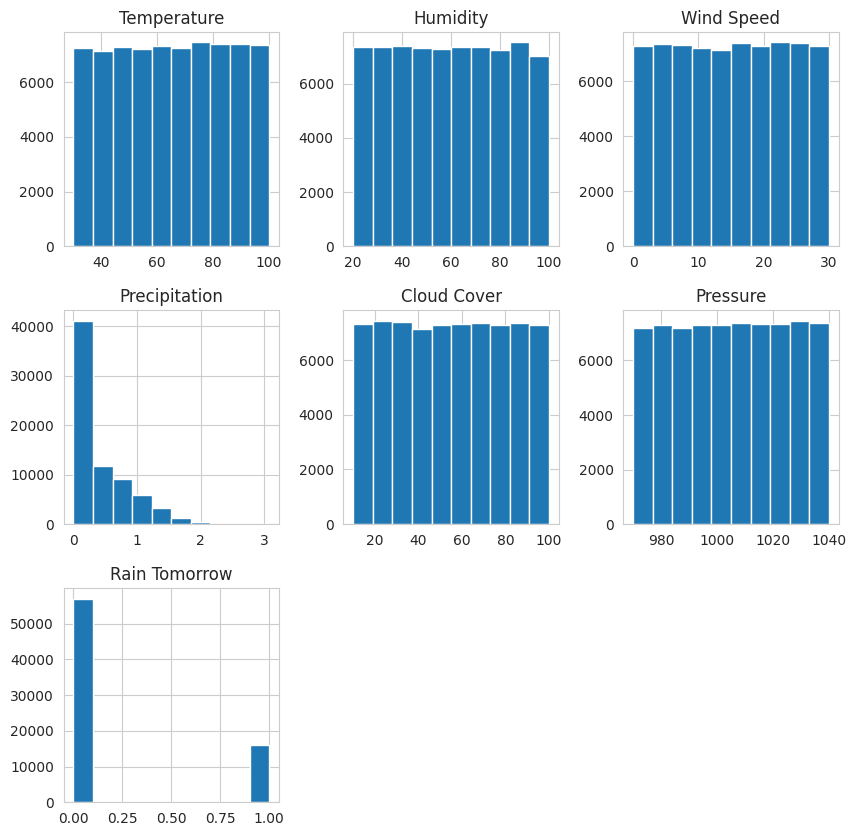

In [12]:
# гистограммы распределений
sns.set_style('whitegrid')
numbers = pd.Series(data.columns)
data[numbers].hist(figsize=(10, 10))
plt.show()

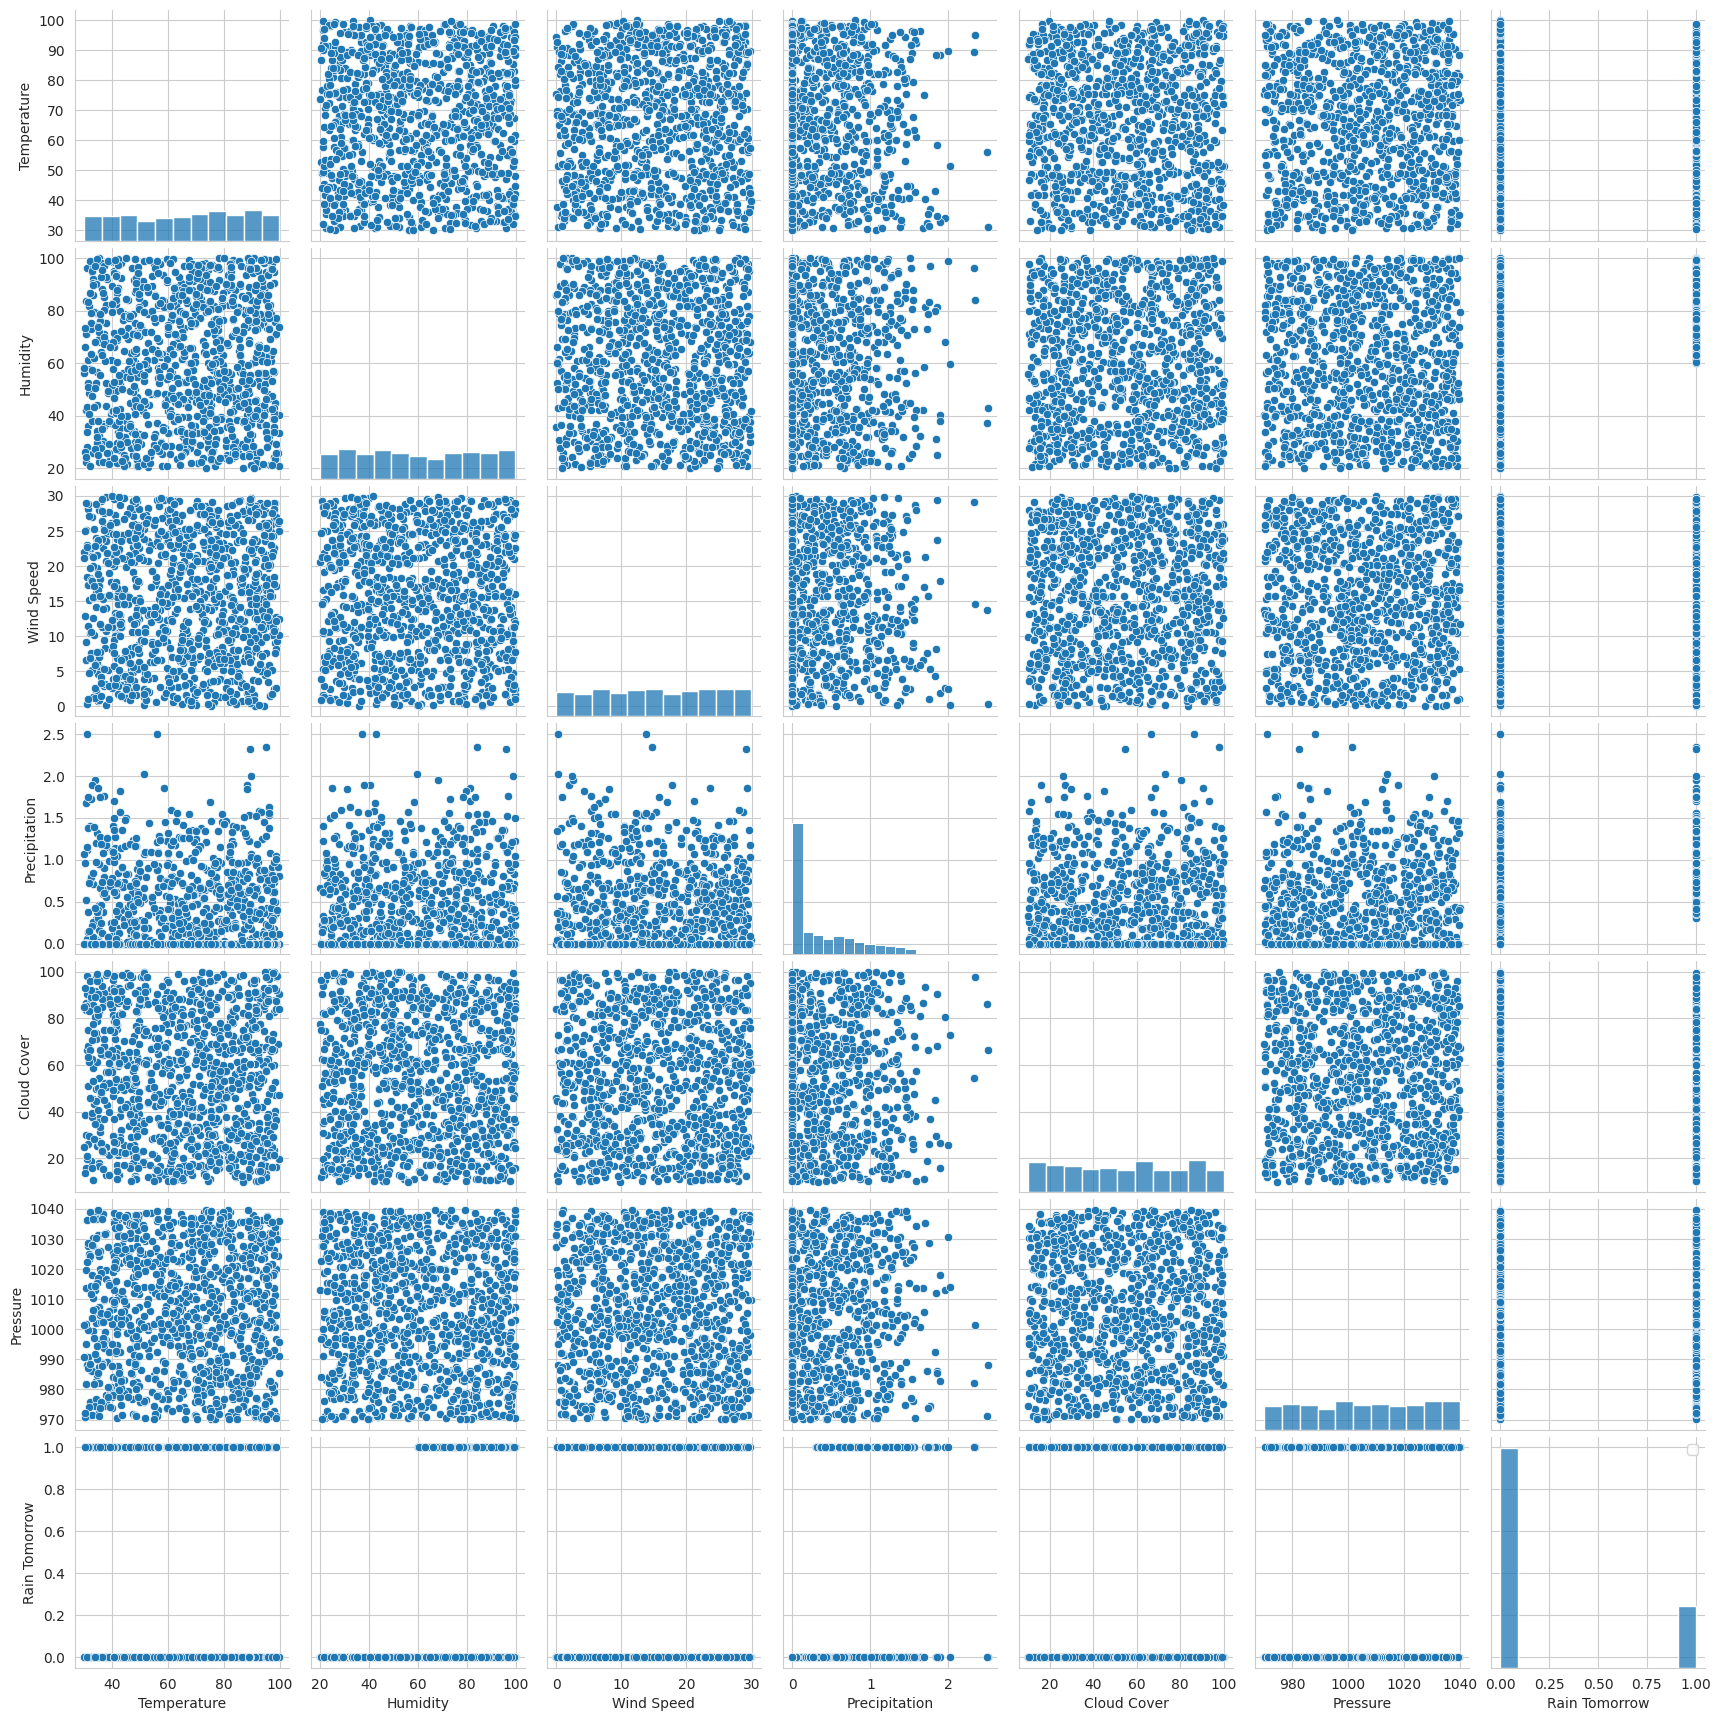

In [13]:
# диаграммы рассеивания для каждой пары признаков
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], diag_kind='hist')
plt.legend()
pass

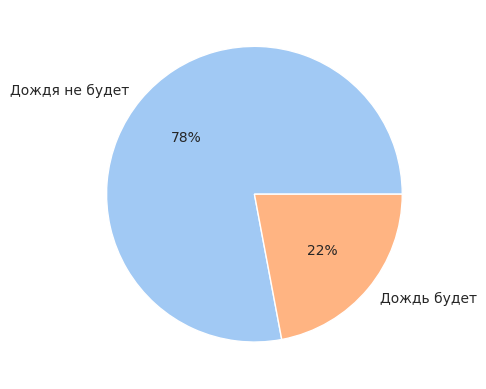

In [14]:
# распределение целевой переменной Rain Tomorrow
plt.pie(data['Rain Tomorrow'].value_counts(), labels=['Дождя не будет', 'Дождь будет'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

In [15]:
data['Rain Tomorrow'].value_counts()

,count
Rain Tomorrow,
0,56988
1,16112


классы несбалансированы

корреляционная матрица

In [16]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.corr()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
Temperature,1.000000,0.003915,0.003431,0.003741,0.000318,0.004250,-0.003593
Humidity,0.003915,1.000000,-0.006497,0.000187,-0.002585,-0.001780,0.461646
Wind Speed,0.003431,-0.006497,1.000000,-0.006679,0.004066,0.003659,-0.011715
Precipitation,0.003741,0.000187,-0.006679,1.000000,-0.004482,0.000787,0.489804
Cloud Cover,0.000318,-0.002585,0.004066,-0.004482,1.000000,-0.004347,-0.003385
Pressure,0.004250,-0.001780,0.003659,0.000787,-0.004347,1.000000,-0.002179
Rain Tomorrow,-0.003593,0.461646,-0.011715,0.489804,-0.003385,-0.002179,1.000000


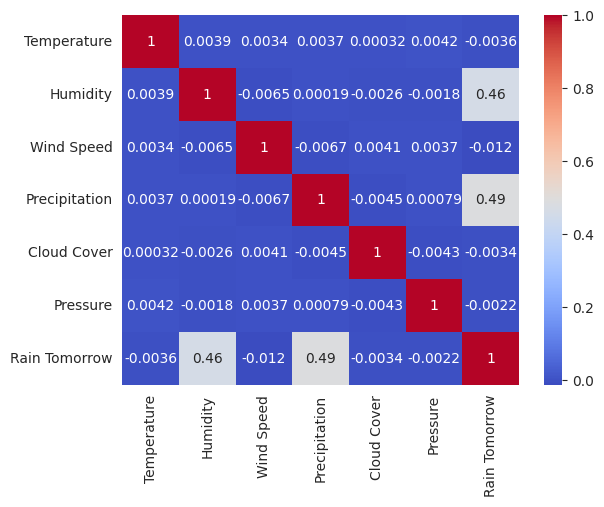

In [17]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

признаки Humidity и Preciptation не сильно коррелируют с целевой переменной Rain Tomorrow

# 3. Обработка пропущенных значений.

In [18]:
data.isnull().sum()

,0
Date,0
Location,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation,0
Cloud Cover,0
Pressure,0
Rain Tomorrow,0


пропущенных значений нет.

# 4. Обработка категориальных признаков.

In [19]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

data

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,2024,1
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,2024,1
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,2024,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,2024,1
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,2024,1
...,...,...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0,2025,12
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0,2025,12
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1,2025,12
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1,2025,12


In [20]:
data = data.drop(columns=['Date'])
data.head()

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month
0,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,2024,1
1,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,2024,1
2,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,2024,1
3,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,2024,1
4,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,2024,1


In [21]:
data = pd.get_dummies(data, columns=['Location'], drop_first=True)
data.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Location_Charlotte,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,2024,1,False,...,False,True,False,False,False,False,False,False,False,False
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,2024,1,False,...,False,True,False,False,False,False,False,False,False,False
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,2024,1,False,...,False,True,False,False,False,False,False,False,False,False
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,2024,1,False,...,False,True,False,False,False,False,False,False,False,False
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,2024,1,False,...,False,True,False,False,False,False,False,False,False,False


# 5. Нормализация.

In [22]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Location_Charlotte,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,1.105748,0.684138,1.541352,-0.822680,0.564810,1.032191,-0.531716,-0.998626,-1.600150,-0.229414,...,-0.229414,4.358869,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414
1,0.894647,-1.351004,-0.297796,0.287174,-0.513298,-0.456048,-0.531716,-0.998626,-1.600150,-0.229414,...,-0.229414,4.358869,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414
2,0.780013,0.210916,-0.096106,1.108282,0.862964,-1.206662,1.880676,-0.998626,-1.600150,-0.229414,...,-0.229414,4.358869,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414
3,0.639187,-0.005899,0.510580,-0.624432,-0.092432,-1.294991,-0.531716,-0.998626,-1.600150,-0.229414,...,-0.229414,4.358869,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414
4,-1.391794,-1.088534,-1.306799,2.044165,1.179302,1.317313,-0.531716,-0.998626,-1.600150,-0.229414,...,-0.229414,4.358869,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,-1.215883,0.226497,1.587359,-0.822680,-0.029801,-1.390439,-0.531716,1.001362,1.588649,-0.229414,...,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,4.358869
73096,-0.620645,-1.268723,-0.315508,1.011650,-1.265266,-1.216812,-0.531716,1.001362,1.588649,-0.229414,...,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,4.358869
73097,-0.430059,1.598240,-1.398496,1.687585,-0.100328,0.558960,1.880676,1.001362,1.588649,-0.229414,...,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,4.358869
73098,0.028046,0.174497,1.109096,0.195406,0.840661,1.347272,1.880676,1.001362,1.588649,-0.229414,...,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,-0.229414,4.358869


In [23]:
data_stand.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Year,Month,Location_Charlotte,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
count,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,...,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04,7.310000e+04
mean,-2.688593e-16,4.179663e-16,1.475032e-16,4.879514e-17,3.355395e-16,-1.156824e-14,5.637685e-18,1.467524e-13,-1.146977e-16,-1.150865e-16,...,1.088656e-16,1.088656e-16,5.909849e-17,1.088656e-16,5.909849e-17,5.909849e-17,1.088656e-16,7.154028e-17,1.104209e-16,1.244179e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.741159e+00,-1.728716e+00,-1.732346e+00,-8.226797e-01,-1.729702e+00,-1.741006e+00,-5.317164e-01,-9.986261e-01,-1.600150e+00,-2.294142e-01,...,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01
25%,-8.662517e-01,-8.702944e-01,-8.689584e-01,-8.226797e-01,-8.707457e-01,-8.650991e-01,-5.317164e-01,-9.986261e-01,-7.304773e-01,-2.294142e-01,...,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01
50%,5.576543e-03,5.548661e-04,9.753270e-03,-4.079888e-01,2.629249e-03,5.354140e-03,-5.317164e-01,-9.986261e-01,1.391952e-01,-2.294142e-01,...,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01
75%,8.638265e-01,8.653797e-01,8.690834e-01,5.950340e-01,8.648003e-01,8.687138e-01,-5.317164e-01,1.001362e+00,1.008868e+00,-2.294142e-01,...,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01,-2.294142e-01
max,1.723027e+00,1.739521e+00,1.728174e+00,5.659790e+00,1.734097e+00,1.723616e+00,1.880676e+00,1.001362e+00,1.588649e+00,4.358869e+00,...,4.358869e+00,4.358869e+00,4.358869e+00,4.358869e+00,4.358869e+00,4.358869e+00,4.358869e+00,4.358869e+00,4.358869e+00,4.358869e+00


In [24]:
data = data_stand

Классы признака Rain Tomorrow не сбалансированы. Поэтому необходимо выполнить балансировку.

In [25]:
X = data.drop(columns = ['Rain Tomorrow'])
y = data['Rain Tomorrow']
y = y.astype(int)

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

# 6. Разбиение на обучающую и тестовую выборки

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(79783, 34193)

# 7. kNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print('Ошибка на обучающем наборе: ', err_train, 'Ошибка на тестовом наборе: ', err_test)
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающем наборе:  0.02882819648296003 Ошибка на тестовом наборе:  0.0631415786856959
Accuracy Score train : 0.97117180351704
Accuracy Score test : 0.9368584213143041


ошибки на обучающей и тестовой выборках очень маленькие, метод с высокой точностью может предсказывать результат. Однако попробуем добиться еще большей точности, для этого найдем оптимальный параметр.

# 8. Подбор оптимального параметра для kNeighborsClassifier

In [29]:
from sklearn.model_selection import GridSearchCV

nnb = list(range(1, 10))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)
best_n_neighbors = grid.best_estimator_.n_neighbors

print("Оптимальный параметр:", best_n_neighbors)

Оптимальный параметр: 1


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print('Ошибка на обучающем наборе: ', err_train, 'Ошибка на тестовом наборе: ', err_test)
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающем наборе:  0.0 Ошибка на тестовом наборе:  0.03690813909279677
Accuracy Score train : 1.0
Accuracy Score test : 0.9630918609072032


ошибка на обучающей выборке отсутствует, переобучения нет, так как точность на тестовой выборке большая, и с подбором оптимального параметра она только увеличилась.
Убедимся, что метод действительно верно классифицирует данные

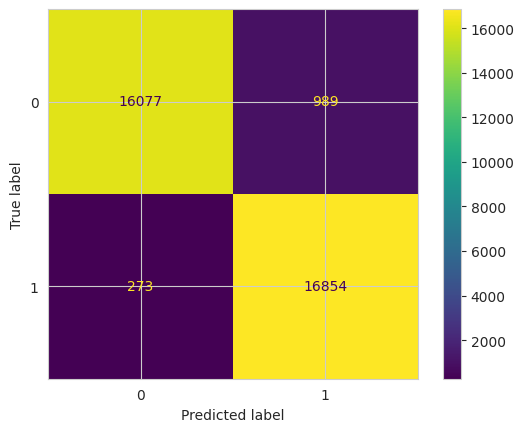

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

действительно метод показал хорошую точность классификации. ошибок FP всего 273, но ошибок FN тоже не очень много по сравнению с правильными значениями, однако их сильно больше, чем ошибок FP.

# 9. Другие классификаторы

# RandomForestClassifier c оптимальным параметром

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

rf_params = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10)
rf_params.fit(X_train, y_train)
best_params = rf_params.best_params_

print("Лучшие параметры для Random Search:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие параметры для Random Search: {'n_estimators': 100, 'max_depth': 10}


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print('Ошибка на обучающем наборе: ', err_train, 'Ошибка на тестовом наборе: ', err_test)
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающем наборе:  0.0 Ошибка на тестовом наборе:  0.0
Accuracy Score train : 1.0
Accuracy Score test : 1.0


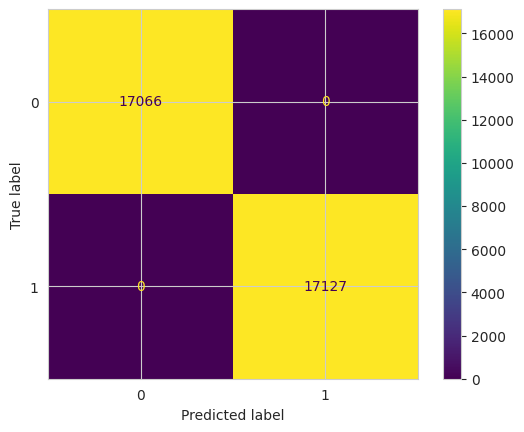

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

метод может точно классифицировать данные. ошибки FP и FN равны 0.

# LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print('Ошибка на обучающем наборе: ', err_train, 'Ошибка на тестовом наборе: ', err_test)
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающем наборе:  0.13554265946379554 Ошибка на тестовом наборе:  0.13257099406311235
Accuracy Score train : 0.8644573405362045
Accuracy Score test : 0.8674290059368877


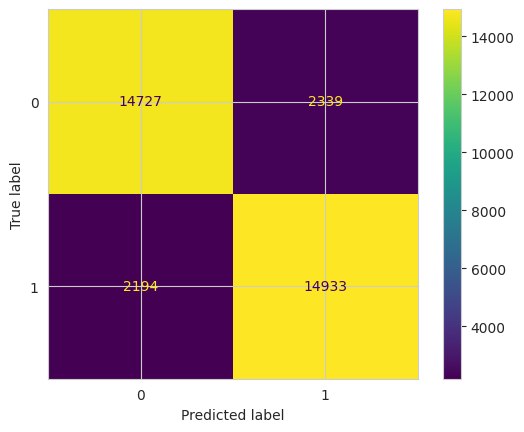

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

этот метод показал низкую точность по сравнению с предыдущими, допустил примерно одинаковое количество ошибок FN и FP.

# SVC

In [37]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print('Ошибка на обучающем наборе: ', err_train, 'Ошибка на тестовом наборе: ', err_test)
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающем наборе:  0.028326836544125943 Ошибка на тестовом наборе:  0.030678793905185273
Accuracy Score train : 0.9716731634558741
Accuracy Score test : 0.9693212060948148


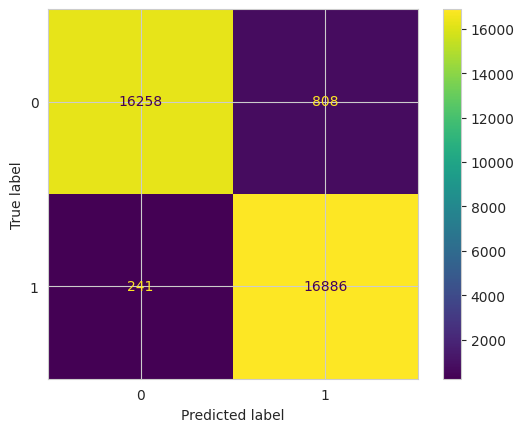

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

наблюдается аналогичная ситуация, как в методе kNeighbors. Метод достиг высокой точности. Ошибок FP всего 241, а ошибок FN существенно больше, чем FP.

# GradientBoostingClassifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

y_train_predict = gbc.predict(X_train)
y_test_predict = gbc.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print('Ошибка на обучающем наборе: ', err_train, 'Ошибка на тестовом наборе: ', err_test)
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)}')

Ошибка на обучающем наборе:  0.0 Ошибка на тестовом наборе:  0.0
Accuracy Score train : 1.0
Accuracy Score test : 1.0


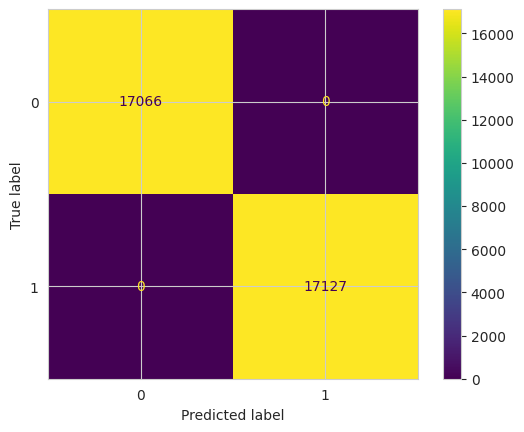

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)
disp.plot()
plt.show()

аналогичня ситуация как и с методом Random Forest.

Получим оценки "важности" признаков

In [41]:
importances = rf.feature_importances_
importances

array([1.36531064e-03, 4.50729347e-01, 1.71753637e-03, 5.41469098e-01,
       1.51796256e-03, 1.39364968e-03, 1.56912143e-04, 6.54949322e-04,
       4.56518178e-05, 7.08685593e-05, 4.07797050e-05, 2.39079353e-05,
       4.79142305e-05, 5.93734282e-05, 5.35236386e-05, 2.92408539e-05,
       6.20467948e-05, 4.47716377e-05, 5.40431938e-05, 4.29997646e-05,
       5.26367112e-05, 8.66146280e-05, 9.14923388e-05, 4.75489378e-05,
       5.59543406e-05, 4.61099526e-05, 3.97555099e-05])

In [42]:
np.sum(importances)

1.0000000000000002

In [43]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

,0
Precipitation,0.541469
Humidity,0.450729
Wind Speed,0.001718
Cloud Cover,0.001518
Pressure,0.001394
Temperature,0.001365
Month,0.000655
Year,0.000157
Location_San Diego,0.000091
Location_San Antonio,0.000087


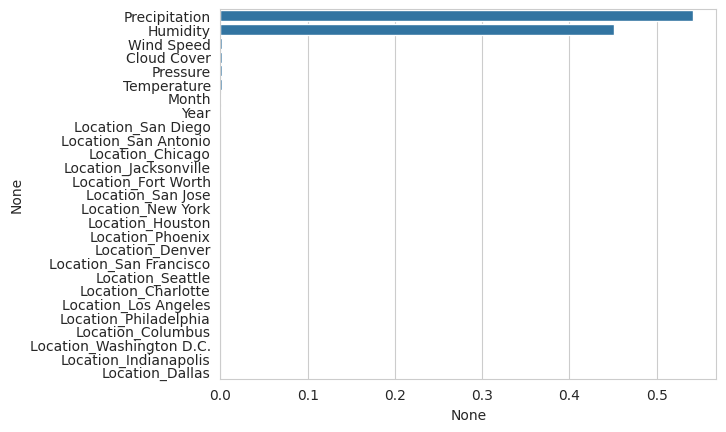

In [44]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# Общие выводы:
Была решена задача классификации для предсказания дождя на следующий день.

Большая часть признаков оказались неважными для классификации. Наиболее важными признаками оказались Precipitation и Humidity. У этих признаков с целевым признаком Rain Tomorrow присутствует корреляция, но она была достаточно низкой, чтобы не исключать эти признаки.

При подготовке данных к обучению были обработаны категориальные признаки. Поскольку признаки были разнородные, то они были нормализованы. Также классы были сбалансированы.

Для обучения использовалось 5 методов: kNeighborsClassifier, RandomForestClassifier, SVC, LogisticRegression, GradientBoostingClassifier. Точность на обучающей и на тестовой выборках для каждого метода достигла:


1.   kNeighborsClassifier (с оптимальным параметром)
      
      * обучающая - 100%
      * тестовая ~ 96.3%

2.   RandomForestClassifier (с оптимальным параметром)
      
      * обучающая - 100%
      * тестовая - 100%

3.   SVC
      
      * обучающая ~ 97.2%
      * тестовая ~ 97%

4.   LogisticRegression
      
      * обучающая 86.4%
      * тестовая ~ 86.7%

5.   GradientBoostingClassifier      
      * обучающая - 100%
      * тестовая - 100%

Таким образом, лучшими методами для прогнозирования дождя на следующий день оказались методы RandomForestClassifier (с оптимальным параметром) и GradientBoostingClassifier, худшим - LogisticRegression.






